In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
enrollment_total = pd.read_csv('Data/university_enrollment/total_2013-2017.csv', 
                               skiprows=1, 
                               names = ['university', 'total', 'year'])
enrollment_total.head()

,university,total,year
0,Alumnos matriculados,208.188,2017
1,Sistema universitario público,149.449,2017
2,Universidad de Barcelona,45.372,2017
3,Universidad Autónoma de Barcelona,31.848,2017
4,Universidad Politécnica de Cataluña,23.575,2017


In [3]:
enrollment_foregein = pd.read_csv('Data/university_enrollment/tot_forgein_2014-2018.csv', 
                               skiprows=1, 
                               names = ['university', 'total', 'year'])
enrollment_foregein.head()

,university,total,year
0,Sistema universitario público,17266,2018
1,Universidad de Barcelona,3540,2018
2,Universidad Autónoma de Barcelona,5397,2018
3,Universidad Politécnica de Cataluña,2923,2018
4,Universidad Pompeu Fabra,2911,2018


In [4]:
population_total = pd.read_csv('Data/population/padron_2014_2018.csv')
population_total.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Nacionalitat,Edat_quinquennal,Nombre
0,2018,1,Ciutat Vella,1,el Raval,Home,Espanyola,0-4 anys,436
1,2018,1,Ciutat Vella,2,el Barri Gòtic,Home,Espanyola,0-4 anys,117
2,2018,1,Ciutat Vella,3,la Barceloneta,Home,Espanyola,0-4 anys,143
3,2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Home,Espanyola,0-4 anys,247
4,2018,2,Eixample,5,el Fort Pienc,Home,Espanyola,0-4 anys,464


In [5]:
foregein_population = population_total.loc[population_total['Nacionalitat'] 
                                           == 'Estrangera'].groupby(['Any', 'Edat_quinquennal'])['Nombre'].sum()

In [6]:
foregein_population

Any   Edat_quinquennal
2014  0-4 anys            13870
      10-14 anys           8058
      15-19 anys           9617
      20-24 anys          19910
      25-29 anys          39403
      30-34 anys          49228
      35-39 anys          40612
      40-44 anys          27562
      45-49 anys          18493
      5-9 anys             8730
      50-54 anys          12487
      55-59 anys           7882
      60-64 anys           4871
      65-69 anys           3120
      70-74 anys           1941
      75-79 anys           1238
      80-84 anys            685
      85-89 anys            398
      90-94 anys            152
      95 anys i més          50
2015  0-4 anys            13292
      10-14 anys           7718
      15-19 anys           9370
      20-24 anys          19928
      25-29 anys          37909
      30-34 anys          45863
      35-39 anys          39913
      40-44 anys          27315
      45-49 anys          18673
      5-9 anys             8913
                 

In [7]:
year_bins = ['15-19 anys', '20-24 anys', '25-29 anys', '30-34 anys','35-39 anys', '40-44 anys']
foregein_population = population_total.loc[population_total['Edat_quinquennal'].isin(year_bins)]
foregein_population= foregein_population.loc[foregein_population['Nacionalitat'] 
                                           == 'Estrangera'].groupby(['Any'])['Nombre'].sum()

In [8]:
foregein_population

Any
2014    186332
2015    180298
2016    182747
2017    196457
2018    204518
Name: Nombre, dtype: int64

Text(0, 0.5, 'Non Spain Population in BCN ages 15 - 44')

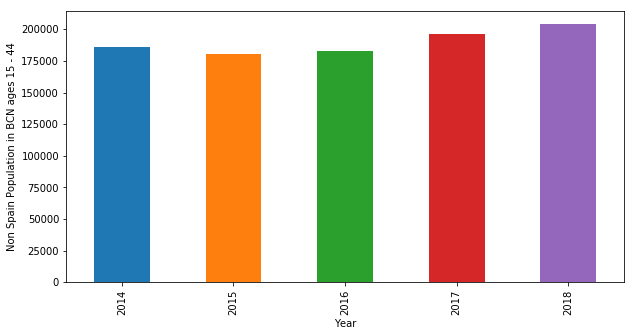

In [9]:
plt.figure(figsize=(10, 5))
foregein_population.plot.bar()
plt.xlabel('Year')
plt.ylabel('Non Spain Population in BCN ages 15 - 44')

Text(0, 0.5, 'Thousands of students')

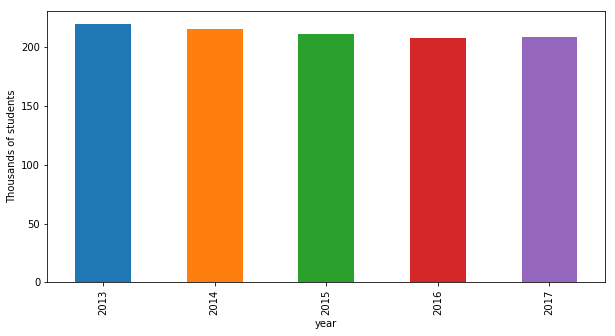

In [10]:
#Average enrollment per year
plt.figure(figsize=(10, 5))
enrollment_byyear = enrollment_total.groupby('year')['total'].max()
enrollment_byyear.plot.bar()
plt.ylabel('Thousands of students')

Text(0, 0.5, 'Non BCN students')

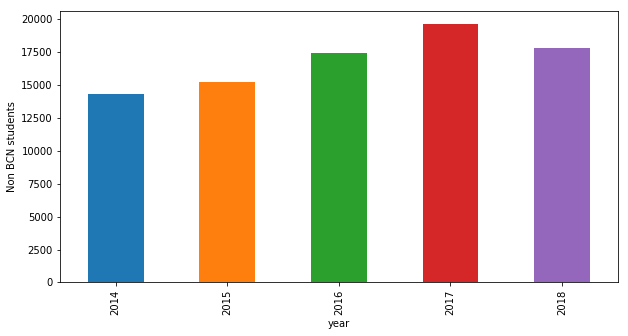

In [11]:
#Average foregein enrollment per year
plt.figure(figsize=(10, 5))
enrollment_byyear_foregein = enrollment_foregein.groupby('year')['total'].max()
enrollment_byyear_foregein.plot.bar()
plt.ylabel('Non BCN students')

In [12]:
enrollment_byyear

year
2013    219.915
2014    215.448
2015    210.713
2016    207.663
2017    208.188
Name: total, dtype: float64

In [13]:
enrollment_byyear_foregein[2018]*.3

5347.2

In [14]:
enrollment_total.set_index('university').T

university,Alumnos matriculados,Sistema universitario público,Universidad de Barcelona,Universidad Autónoma de Barcelona,Universidad Politécnica de Cataluña,Universidad Pompeu Fabra,Universidad de Girona,Universidad de Lleida,Universidad Rovira i Virgili,Sistema universitario privado,...,U. Pompeu Fabra,U. Girona,U. Lleida,U. Rovira i Virgili,U. Oberta de Catalunya,Sistema universitario privado,U. Ramon Llull,U. Vic,U. Internacional de Catalunya,U. Abat Oliba CEU
total,208.188,149.449,45.372,31.848,23.575,14.851,13.622,8.43,11.751,23.324,...,12.137,13.66,8.544,11.922,38.554,22.309,12.045,5.437,3.425,1.402
year,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.00,2017.000,2017.000,...,2013.000,2013.00,2013.000,2013.000,2013.000,2013.000,2013.000,2013.000,2013.000,2013.000


In [15]:
#School with most enrolled students
enrollmentperuniversity = enrollment_total.set_index('university').T.drop(columns =['Alumnos matriculados', 
                                  'Sistema universitario público', 
                                  'Sistema universitario privado']).T.groupby('university')['total'].sum().sort_values(ascending = False)

In [21]:
enrollmentperuniversity_foregein = enrollment_foregein.set_index('university').T.drop(columns =['Total','Sistema universitario público', 
                                  'Sistema universitario privado']).T.groupby('university')['total'].sum().sort_values(ascending = True)

In [22]:
enrollmentperuniversity_foregein

university
Universidad Abierta de Cataluña                          24
Universidad Abat Oliba CEU                              801
Universidad Internacional de Cataluña                  1423
Universidad de Vic-Universidad Central de Cataluña     2653
Universidad Ramon Llull                                2669
Universidad de Lleida                                  2976
Universidad de Girona                                  3296
Universidad Rovira i Virgili                           4540
Universidad Pompeu Fabra                              11976
Universidad Politécnica de Cataluña                   14122
Universidad de Barcelona                              16447
Universidad Autónoma de Barcelona                     23515
Name: total, dtype: int64

Text(0, 0.5, 'Thousands of students enrolled from 2013 - 2015')

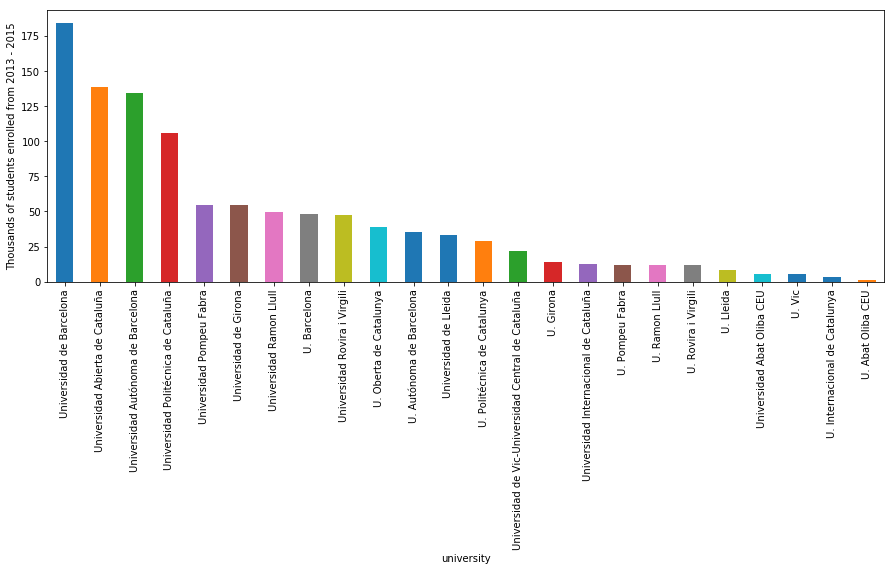

In [23]:
plt.figure(figsize=(15, 5))
enrollmentperuniversity.plot.bar()
plt.ylabel('Thousands of students enrolled from 2013 - 2015')

Text(0.5, 0, 'Foreign Students enrolled from 2014 - 2018')

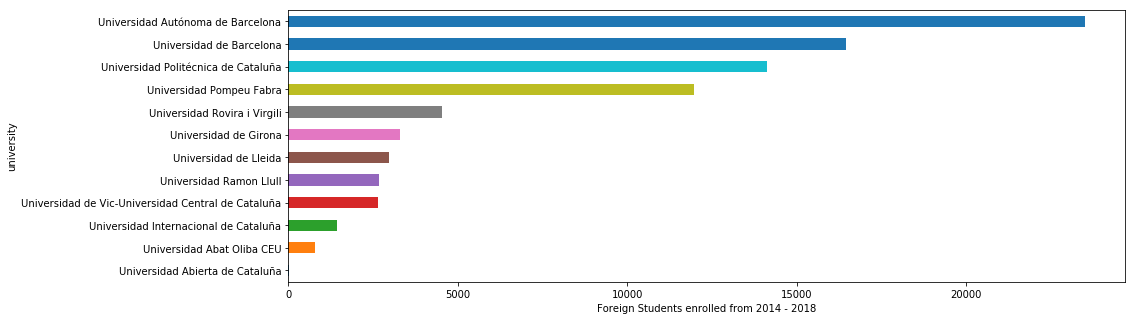

In [24]:
plt.figure(figsize=(15, 5))
enrollmentperuniversity_foregein.plot.barh()
plt.xlabel('Foreign Students enrolled from 2014 - 2018')